# Ciência de Dados <br>Análise Exploratória de Dados

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Nesta aula, vamos mostrar como descrevemos os dados em termos de medidas de estatística. Medidas de posição, dispersão e correlação serão descritas, com aplicações em diferentes conjuntos de dados.

## 1. Visualização

Uma das maneiras mais simples de visualizar a distribuição dos dados é através de gráficos de frequência e histogramas.

Um exemplo de um gráfico de frequência:

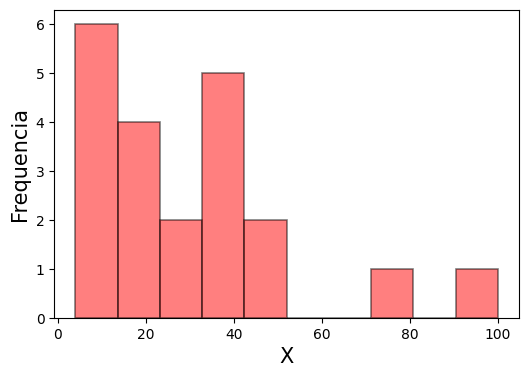

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]

fig= plt.figure(figsize=(6,4))

num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.5, density=False, edgecolor='black', linewidth=1.2)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Frequencia", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

No caso do histograma, a área sob a curva deve ser igual a 1 (notem a diferença na escala do eixo das ordenadas (y)).

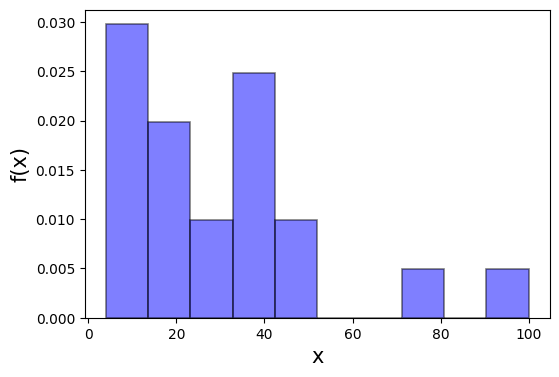

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]

fig= plt.figure(figsize=(6,4))

num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, density=True, edgecolor='black', linewidth=1.2)
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

No caso de variáveis nominais, podemos usar gráficos de barra ou gráficos de setores. Notem que o valor no eixo das abscissas (x) é arbitrário e não deve ser levando em conta.

Y: ['Bom', 'Ruim', 'Ótimo', 'Regular', 'Regular', 'Ótimo', 'Ótimo', 'Bom', 'Ótimo', 'Bom', 'Ótimo']
Valores possíveis: ['Bom' 'Regular' 'Ruim' 'Ótimo']
Frequencia dos valores: [3. 2. 1. 5.]


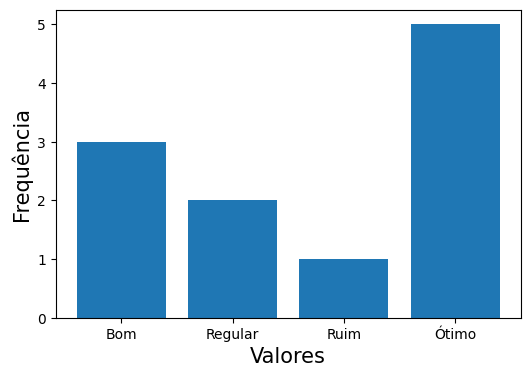

In [ ]:
Y = ["Bom", "Ruim", "Ótimo", "Regular", "Regular", "Ótimo", "Ótimo","Bom", "Ótimo", "Bom", "Ótimo"]
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

fig= plt.figure(figsize=(6,4))

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Valores",fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)
plt.show()

Gráfico de setores:

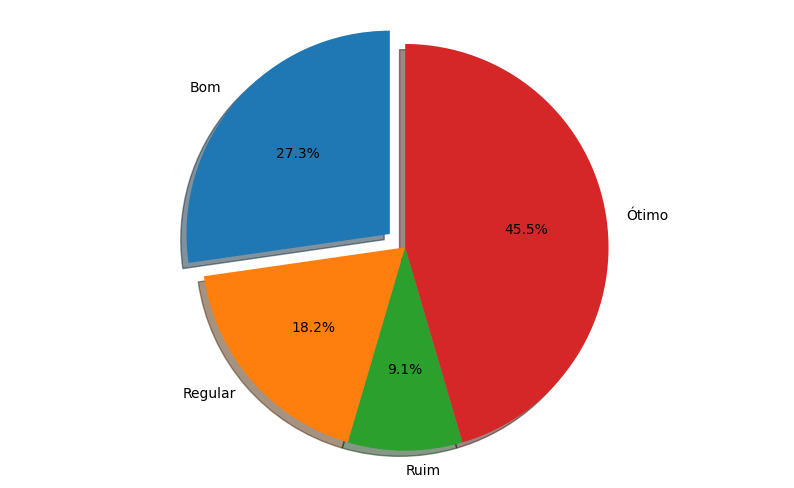

In [ ]:
labels = values
sizes = freq
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Outro gráfico importante é o scatterplot, usado quando queremos verificar a relação entre duas variáveis.

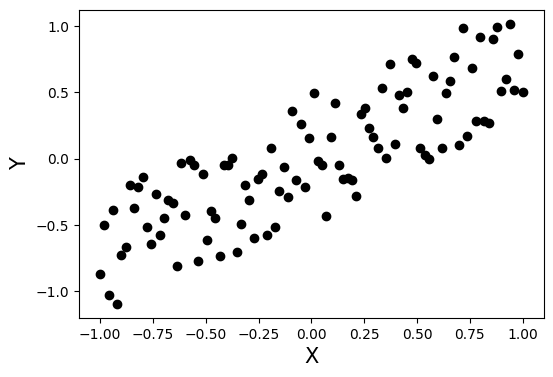

In [ ]:
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
sigma= 0.5
Y = 0.8*X + erro*sigma

fig= plt.figure(figsize=(6,4))

plt.scatter(X, Y, marker='o', color = 'black');
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("X",fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.show(True)

Quando temos três variáveis, uma maneira de visualizarmos os dados é considerar um gráfico de calor, sendo que a escala de cores define a terceira variável.

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


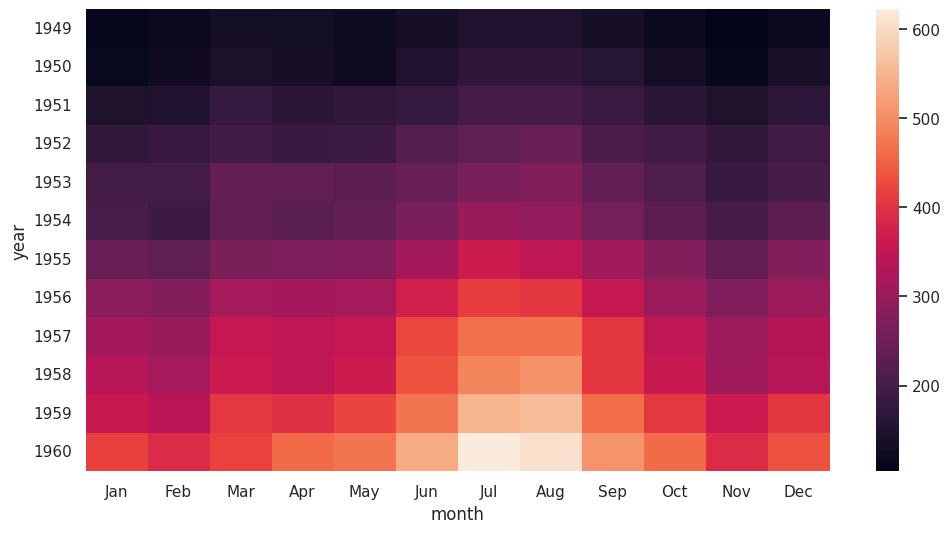

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)

plt.figure(figsize=(12,6))

flights = sns.load_dataset("flights")
flights = flights.pivot(index="year", columns="month", values="passengers")
# mostra o gráfico
ax = sns.heatmap(flights)

<hr>

## 2. Medidas de posição

### Moda

Uma medida importante de tendência central é a moda, que retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais.

Para calcularmos a moda, usamos o pacote Statistics:

In [ ]:
from statistics import mode
X = [1,2,3,1,2,3,4,1,3,6,4,1]
m = mode(X)
print('A moda de X:', m)

A moda de X: 1


Notem que essa biblioteca retorna um erro se houver mais de uma moda. Nesse caso, temos que implementar uma função para retornar todas a modas possíveis.

In [ ]:
Y = [1,1,2,2,2,3]
m = mode(Y)
print('A moda de X:', m)

A moda de X: 2


In [ ]:
def new_mode(X):
    values = np.sort(np.unique(X))
    # vamos calcular a frequência de cada valor presente na lista
    freq = np.zeros(len(values)) # armazena as frequencias
    ind = 0 # indice do vetor de frequências
    for i in values: # para os valores diferentes
        counter = 0 # conta as ocorrências
        for j in range(0,len(X)):
            if(X[j] == i):
                counter = counter + 1
        freq[ind] = counter
        ind = ind + 1
    mx = max(freq)
    md = []
    for i in range(0,len(freq)):
        if(freq[i] == mx):
            md.append(values[i])
    return md
moda = new_mode(X)
print('Moda:', moda)

Moda: [1, 2]


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X: [1, 1, 2, 2, 3]
Valores possíveis: [1 2 3]
Frequencia dos valores: [2. 2. 1.]


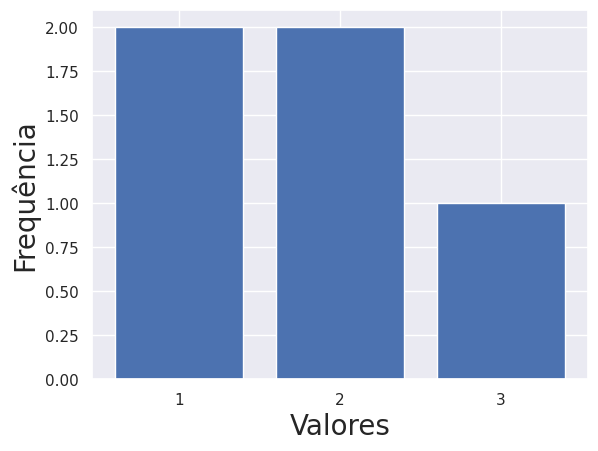

In [ ]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

# Usamos a funções sort e unique do Numpy para encontrar
# os valores possíveis em ordem crescente.
# esses valores serão mostrados na abscissa do gráfico.
values = np.sort(np.unique(X))
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(X)):
        if(X[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X:',X)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xlabel("Valores",fontsize = 20)
plt.ylabel("Frequência", fontsize = 20)


plt.show()

Podemos aplicar a função em dados nominais:

In [ ]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y:', mode(Y))

A moda de Y: red


O gráfico de barras mostrando a frequêbncia:

Y: ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequencia dos valores: [2. 1. 4.]


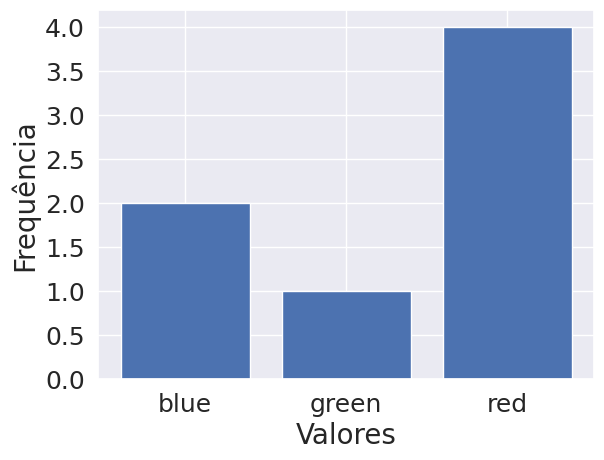

In [ ]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Valores",fontsize = 20)
plt.ylabel("Frequência", fontsize = 20)
plt.show()

Ou ainda em um gráfico de setores:

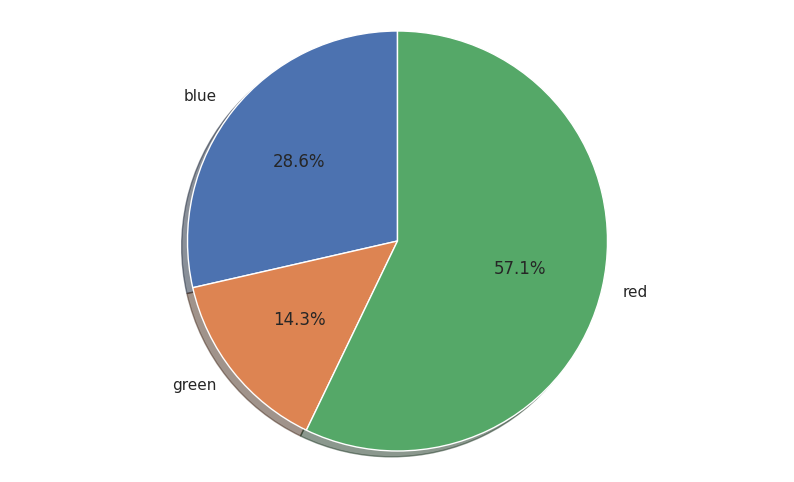

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(freq, explode=(0, 0, 0), labels=values, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Média e Mediana

A média e mediana são medidas de tendência central usadas para dados quantitativos. Assim, a média:

In [ ]:
import numpy as np
X = [1,1,1,2,2,3,4,5,5,5]
mx = np.mean(X)
print('X:', X)
print('A média:', mx)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A média: 2.9


No caso da mediana:

In [ ]:
md = np.median(X)
print('X:', X)
print('A mediana:', md)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A mediana: 2.5


Se adicionarmos um valor extremo aos dados, vejamos como a média e a mediana se comportam:

In [ ]:
X2 = [1,1,1,2,2,3,4,5,5,100]
print('X2:', X2)
print('A nova média:', np.mean(X2))
print('A nova mediana:', np.median(X2))

X2: [1, 1, 1, 2, 2, 3, 4, 5, 5, 100]
A nova média: 12.4
A nova mediana: 2.5


Ou seja, a média é altamente sensível a valores extremos, enquanto que a mediana é mais robusta.

Vamos considerar uma distribuição de probabilidades. Os dados são gerados a partir de distribuições normal e exponencial.

Para a distribuição normal, a média é indicada pela linha contínua e a mediana, pela tracejada.

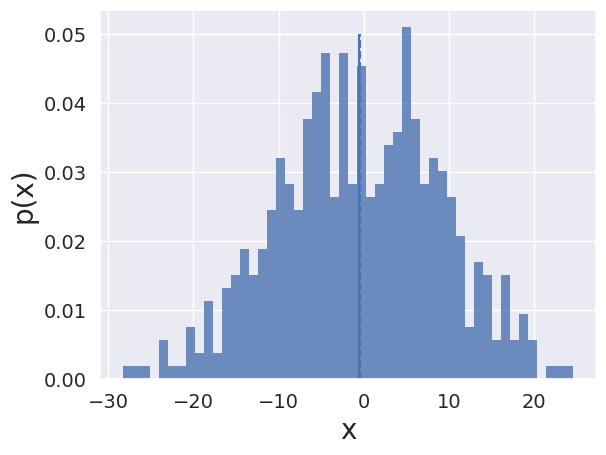

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

mu = 0 # Média da distribuicao normal
sigma = 10 #desvio padrão da distribuição normal
Y = np.random.normal(mu, sigma, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,0.05)
plt.vlines(md,0,0.05, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)", fontsize = 20)
plt.show(True)

Para a distribuição exponencial, a média é indicada pela linha contínua e a mediana, pela tracejada.

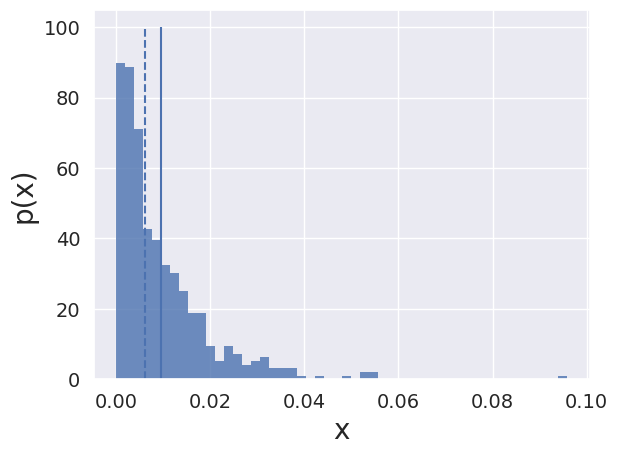

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

lbda = 100 # taxa da distribuição exponencial
beta = 1.0/lbda

Y = np.random.exponential(beta, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)", fontsize = 20)

plt.show(True)

Notamos que a média é similar à mediana se a distribuição é praticamente simétrica em relação à média. Caso a distribuição não seja simétrica, o mais adequado é usar a mediana como medida central.

### Quantis

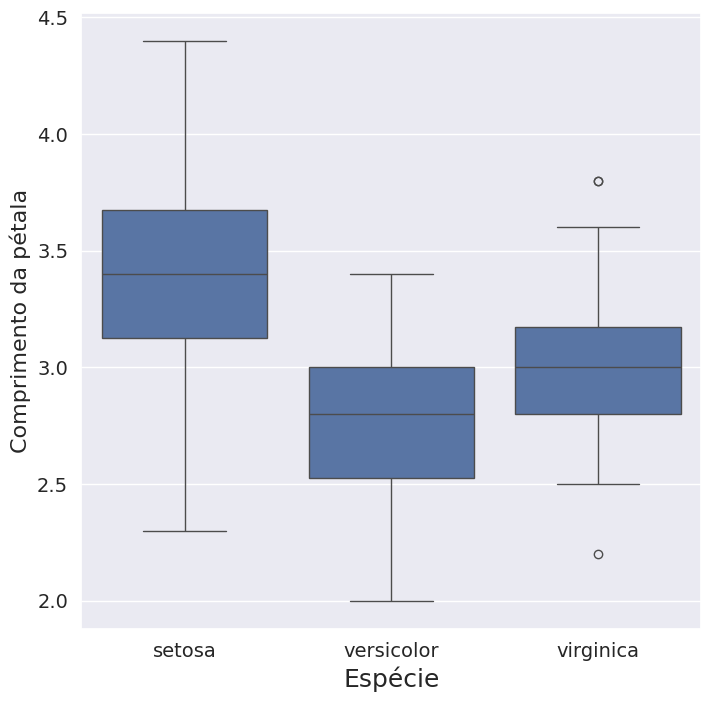

In [ ]:
# biblioteca para mostrar os gráficos
import seaborn as sns
import pandas as pd

data = pd.read_csv('/content/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
# mostra o boxplot
sns.boxplot(x="species", y="sepal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

<hr>

## 3. Medidas de dispersão

As medidas de dispersão mais usadas são a variância e o desvio padrão. A distância interquantil (IQR) também é bastante usada e quantifica a diferença entre o terceiro e primeiro quantil. Já a amplitude simplesmente mede a diferença entre os valores máximo e mínimo.

In [ ]:
from scipy.stats import iqr

def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

X = [0,0,1,1,18]
Y = [4, 4, 4, 4, 4]
mx = np.mean(X)
my = np.mean(Y)
print('X:', X)
print('Média de X:', mx)
print('Variância de X:', variancia(X))
print('IQR de X:', iqr(X))
print('Amplitude de X:', np.max(X)-np.min(X))

print('\n')
print('Y:', Y)
print('Média de Y:', my)
print('Variância de Y:', variancia(Y))
print('IQR de Y:', iqr(Y))
print('Amplitude de Y:', np.max(Y)-np.min(Y))

X: [0, 0, 1, 1, 18]
Média de X: 4.0
Variância de X: 61.5
IQR de X: 1.0
Amplitude de X: 18


Y: [4, 4, 4, 4, 4]
Média de Y: 4.0
Variância de Y: 0.0
IQR de Y: 0.0
Amplitude de Y: 0


Notem que os dados acima possuem a mesma média, mas a variância é bastante diferente.

### Resumo descritivo

Para obtermos um resumo das medidas estatística dos dados:

In [ ]:
import pandas as pd # biblioteca pandas
data = pd.read_csv('/content/iris.csv', header=(0)) # lê os dados a partir do arquivo

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<hr>

## 4. Correlação

### Correlação de Pearson

Vamos considerar alguns casos para vermos como se comporta o coeficiente de correlação de Pearson de acordo com diferentes tendências entre as variáveis $X$ e $Y$.

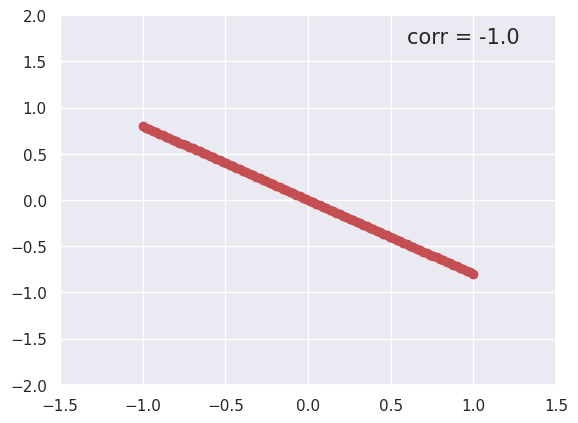

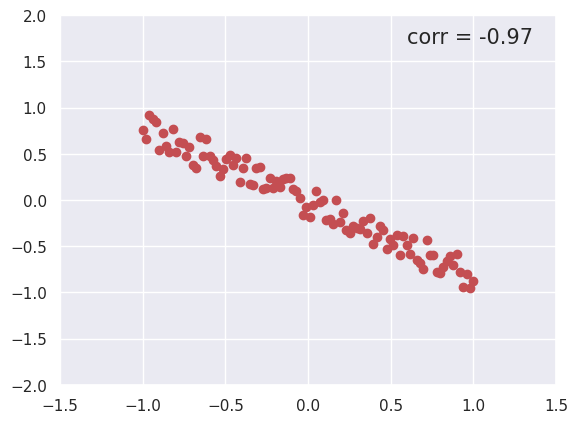

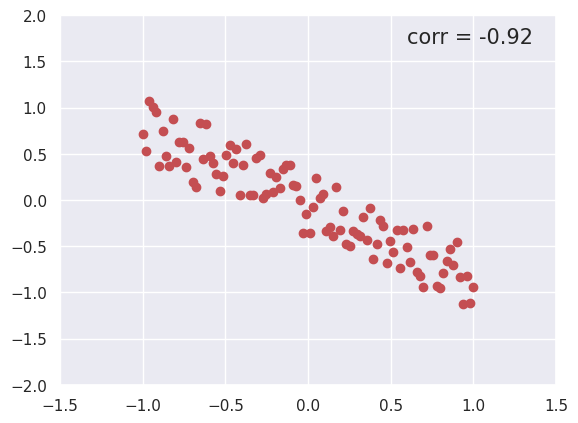

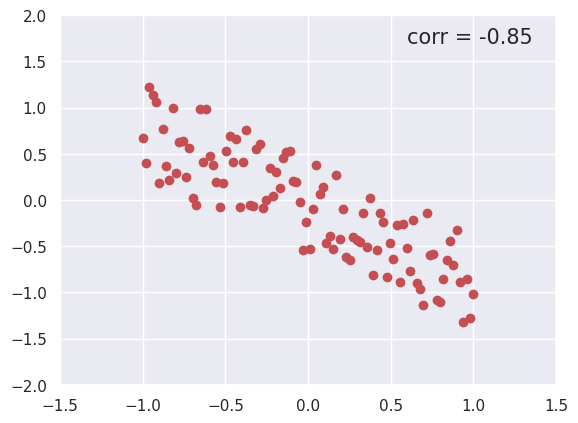

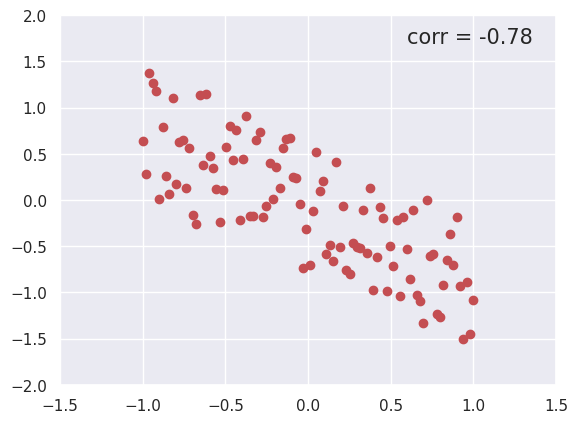

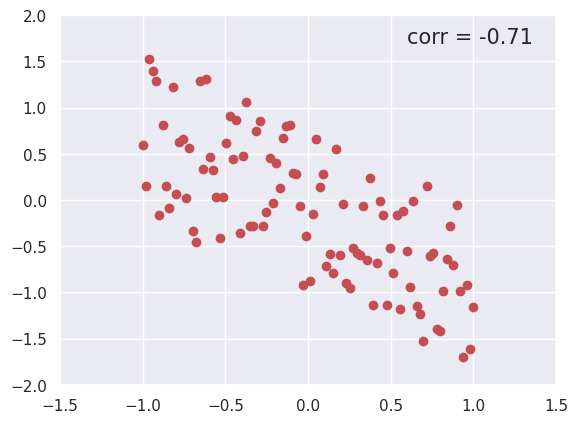

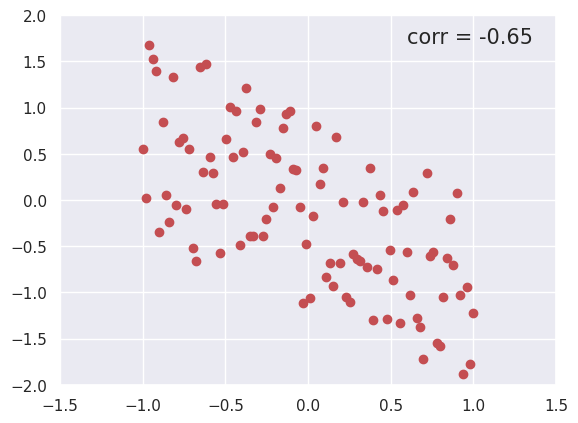

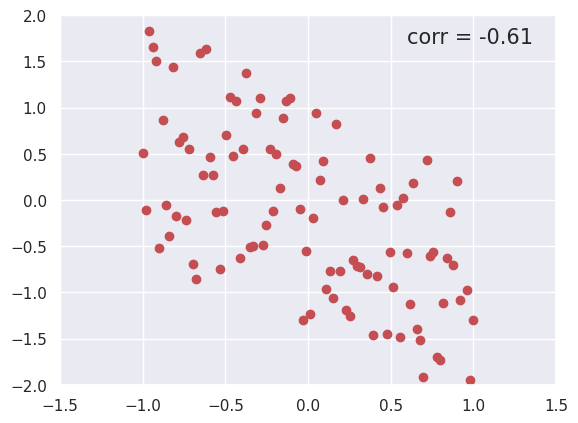

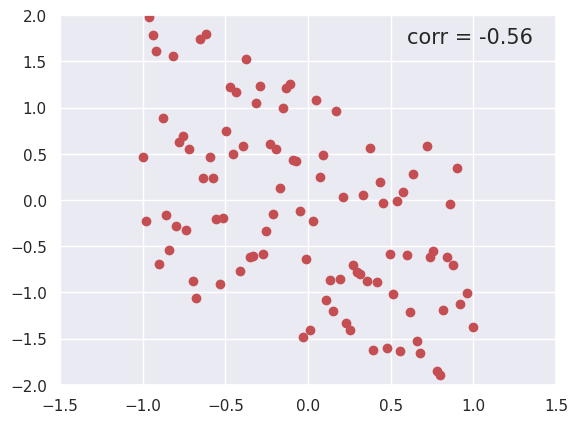

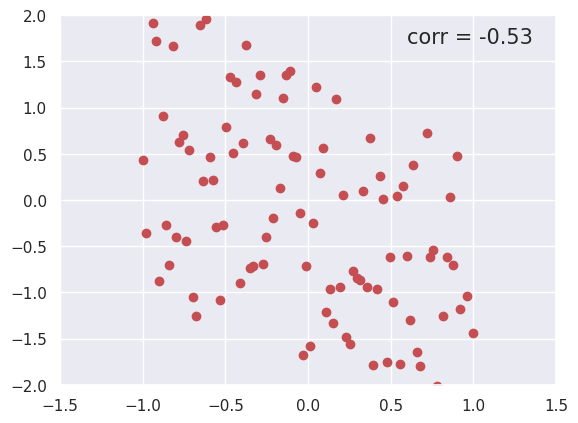

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

N = 100
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = -0.8*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    string = 'corr = '+ str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.show(True)

A medida de correlação é importante para analisar a relação entre as variáveis. Se duas variáveis são altamente correlacionadas, é adequado remover uma delas, de modo a reduzir informação redundante nos dados.

Vamos considerar a base de dados da flor Iris:

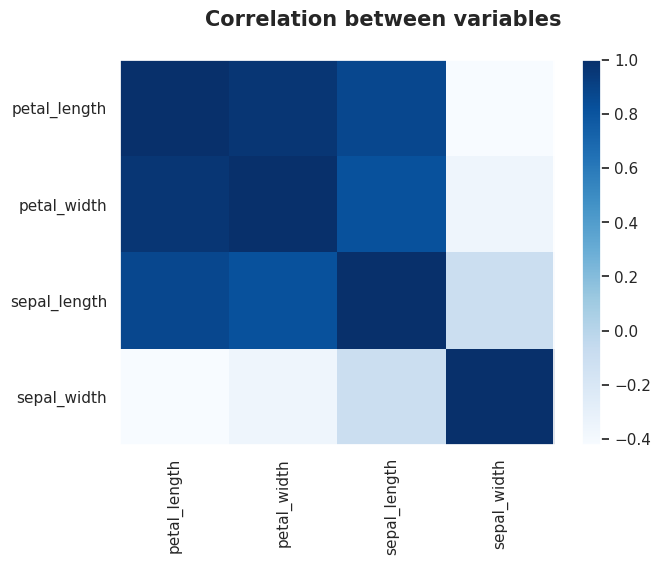

In [ ]:
import pandas as pd # biblioteca pandas
data = pd.read_csv('/content/iris.csv', header=(0)) # lê os dados a partir do arquivo

data = data[['petal_length','petal_width','sepal_length','sepal_width']]

corr = data.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Podemos mostrar a mesma tabela usando a biblioteca Searborn:

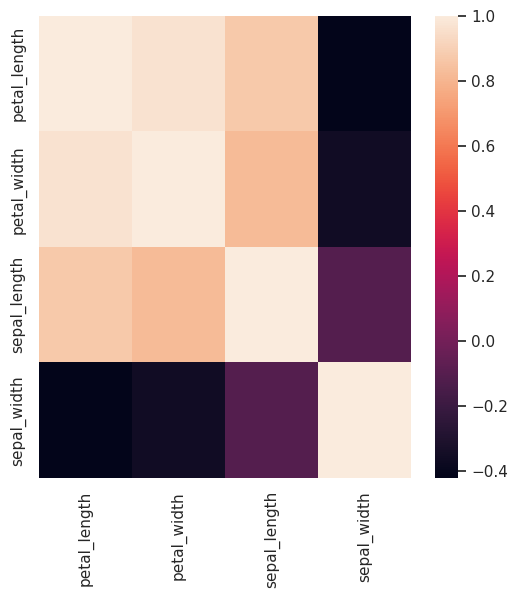

In [ ]:
import seaborn as sns
plt.figure(figsize= (6, 6))
sns.heatmap(data.corr())
plt.show(sns)

### Correlação de Spearman

Além do coeficiente de Pearson, podemos considerar o coeficiente de correlação de Spearman:

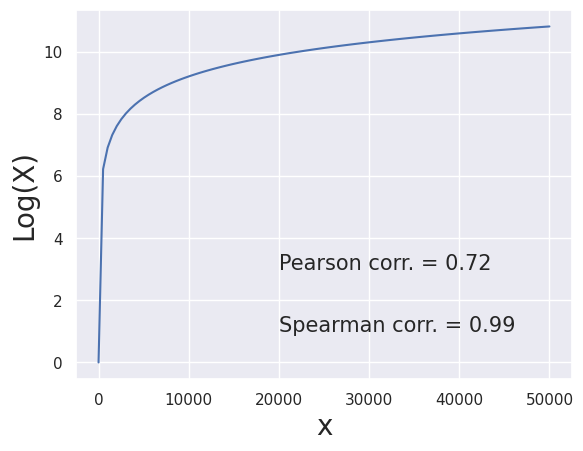

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 100
x = np.linspace(1, 50000, N)
z = np.log(x)

plt.plot(x, z)
plt.xlabel("x",fontsize = 20)
plt.ylabel("Log(X)", fontsize = 20)
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()

Notem que nesse caso, os coeficientes de Spearman e Pearson são diferentes.

### Implementação das correlações de Pearon e Spearman

Vamos considerar um exemplo numérico para obtermos mais intuição sobre o cálculo dessas medidas.

Text(0, 0.5, 'y')

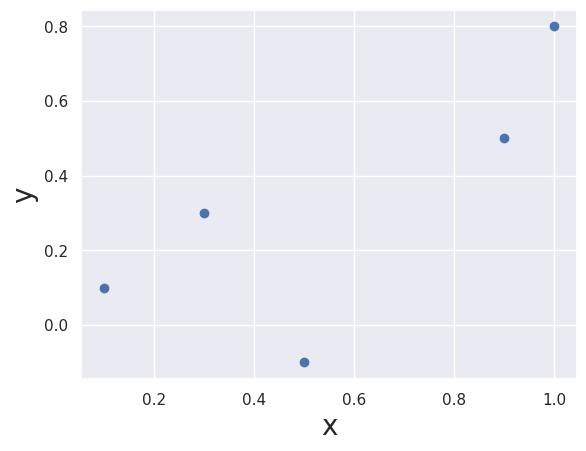

In [ ]:
x = [0.9,0.5, 0.3, 0.1, 1.0]
y = [0.5, -0.1, 0.3, 0.1, 0.8]
plt.plot(x, y, 'bo')
plt.xlabel("x",fontsize = 20)
plt.ylabel("y", fontsize = 20)

O coeficiente de correlação de Pearson:
$$
\rho ={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}\cdot {\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}
$$

Vamos implementar uma função para calculá-lo.

Uma função para calcular a variância:

In [ ]:
def std(x):
    n = len(x)
    xm = 0
    for i in range(0,n):
        xm = xm + x[i]
    xm = xm/n
    std = 0
    for i in range(0,n):
        std = std + (x[i]-xm)**2
    std = np.sqrt(std/(n))
    return std

print("Valor calculado pela função:", std(x))
print("Valor calculado com o Numpy:", np.std(x))

Valor calculado pela função: 0.3440930106817051
Valor calculado com o Numpy: 0.3440930106817051


E o coeficiente de Pearson:

In [ ]:
from scipy.stats import pearsonr, spearmanr

def Pearson(x,y):
    n = len(x)
    # averages
    xm = 0
    ym = 0
    for i in range(0,n):
        xm = xm + x[i]
        ym = ym + y[i]
    xm = xm/n
    ym = ym/n
    r = 0
    for i in range(0,n):
        r = r + (x[i]-xm)*(y[i]-ym)
    r = r/n
    r = r/(std(x)*std(y))
    return r
print("Valor calculado pela função:", Pearson(x,y))
print("Valor calculado usando o pacote statistics:", pearsonr(x, y)[0])

Valor calculado pela função: 0.7516412406984152
Valor calculado usando o pacote statistics: 0.7516412406984154


No caso do coeficiente de Spearman, vamos obter a ordem dos valores de x e y.

In [ ]:
print('x:', x)
print('Sorted x:', [sorted(x).index(i)+1 for i in x])
print('y:', y)
print('Sorted y:', [sorted(y).index(i)+1 for i in y])

x: [0.9, 0.5, 0.3, 0.1, 1.0]
Sorted x: [4, 3, 2, 1, 5]
y: [0.5, -0.1, 0.3, 0.1, 0.8]
Sorted y: [4, 1, 3, 2, 5]


In [ ]:
xr = [sorted(x).index(i)+1 for i in x]
yr = [sorted(y).index(i)+1 for i in y]
print("Valor calculado pela função:", Pearson(xr,yr))
print("Valor calculado usando o pacote statistics:", spearmanr(xr, yr)[0])

Valor calculado pela função: 0.6999999999999998
Valor calculado usando o pacote statistics: 0.7


Logo, vemos que o coeficiente de Spearman nada mais é do que o coeficiente de Pearson aplicado à ordem dos valores.

## Exercícios de fixação

1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1,10] e mostre o gráfico da média em função da variância.

2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +$ ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

6- Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

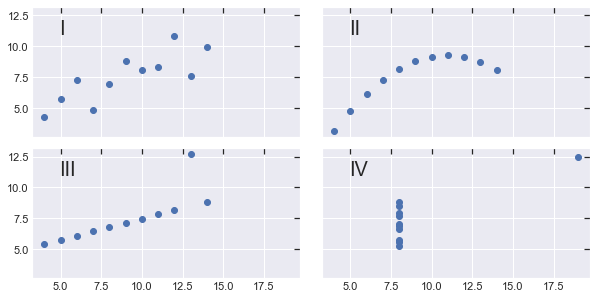

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()